In [1]:
import numpy as np
import matplotlib.pyplot as plt

## codes

In [2]:
def heating_curve(time_series, temperature_series, TIME_UNIT):
    '''
        Plot the heating curve.
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            time_series : [numpy.array] A serie of time in minutes.
            temperature_series : [numpy.array] A serie of time in Celsius.
            TIME_UNIT : [string] Either 'h' or 'min', change the unit of time axis.
            
        returns:
            A figure.
            
        example:
            heating_curve(t_series, T_series, 'h')
    '''
    # data preparation
    t_series = time_series.copy()
    T_series = temperature_series.copy()
    for i in range(len(t_series) - 1):
        t_series[i + 1] = t_series[i + 1] + t_series[i]
    scale = {'min' : 1, 'h' : 60}
    t_series = t_series / scale[TIME_UNIT]
    t_series_str = tuple([str(t) for t in t_series])
    T_series_str = tuple([str(T) for T in T_series])
    
    plt.figure(figsize = (10, 5))
    
    # plot the reference line
    T_pool = [] # check if the horizental line has already been plot
    for i in range(len(t_series) - 2):
        plt.plot([t_series[i + 1], t_series[i + 1]], [T_series[i + 1], min(T_series)], 'k--')
        if T_series[i + 1] in T_pool:
            continue
        else:
            plt.plot([t_series[i + 1], min(t_series)], [T_series[i + 1], T_series[i + 1]], 'k--')
            T_pool.append(T_series[i + 1])
        
    # plot the curve
    plt.plot(t_series, T_series, 'k', linewidth = 3)

    # set up the axis
    plt.xticks(t_series, t_series_str)
    plt.yticks(T_series, T_series_str)
    plt.xlim(min(t_series), max(t_series))
    plt.ylim(bottom = min(T_series))
    plt.xlabel('time / ' + TIME_UNIT)
    plt.ylabel('temperature / $^\circ$C')
    plt.title('Heating Curve')
    plt.show()
    return

In [26]:
def reaction_substances_mass(molar_mass, molar_ratio, mass_needed):
    '''
        Calculate the needed substantces' masses for a certain reaction.
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            molar_mass : [numpy.array] An array of molar_mass (the reaction product should be in the first place).
            molar_ratio : [numpy.array] An array of molar_mass (should be the same order as molar_mass).
            mass_needed : [double] The needed mass for the reaction product.
            
        returns:
            masses_needed : [numpy.array] The calculated masses for the substances.
            
        example:
            molar_mass = np.array([387.44, 105.99, 240.79, 159.60])
            molar_ratio = np.array([3, 3, 2, 3])
            print(reaction_substances_mass(molar_mass, molar_ratio, 27.0))
    '''
    masses = molar_mass * molar_ratio
    masses_needed = mass_needed / masses[0] * masses
    masses_needed = np.round(masses_needed, 4)
    return masses_needed[1:]

## play ground

In [27]:
molar_mass = np.array([387.44, 105.99, 240.79, 159.60])
molar_ratio = np.array([3, 3, 2, 3])
print(reaction_substances_mass(molar_mass, molar_ratio, 25))

[  6.8391  10.3582  10.2984]


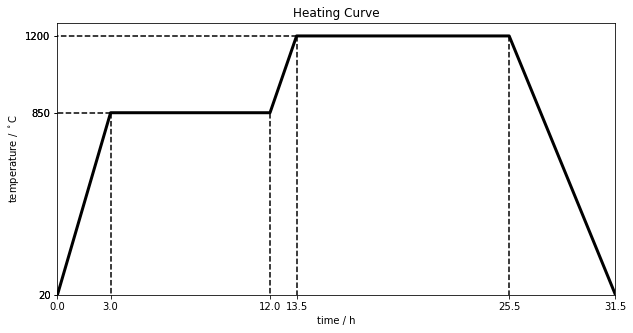

In [3]:
t_series = np.array([0, 180, 540, 90, 720, 360])
T_series = np.array([20, 850, 850, 1200, 1200, 20])
heating_curve(t_series, T_series, 'h')